The intial code below will read both csvs into individual dataframes and then merge both data frames based on their attributes. 

In [39]:
import pandas as pd 
import numpy as np

In [40]:
file_path1 = '/Users/aryanpatel/Downloads/archive/student-mat.csv'

file_path2 = '/Users/aryanpatel/Downloads/archive/student-por.csv'


df1 = pd.read_csv(file_path)

df2 = pd.read_csv(file_path2)


print(df.head())

print(df2.head())
                  

merged_df = pd.merge(df1, df2, on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"], suffixes=('_df1', '_df2'))




columns_to_remove = ['guardian_df2', 'traveltime_df2', 'studytime_df2', 'failures_df2', 'schoolsup_df2', 'famsup_df2', 'paid_df2', 'activities_df2', 'higher_df2', 'romantic_df2', 'famrel_df2', 'freetime_df2', 'goout_df2', 'Dalc_df2', 'Walc_df2', 'health_df2', 'absences_df2']

merged_df = merged_df.drop(columns=columns_to_remove)



merged_df = merged_df.rename(columns={'G1_df1': 'G1_MathGrade', 'G2_df1': 'G2_MathGrade', 'G3_df1': 'G3_MathGrade',
                          'G1_df2': 'G1_PortugueseGrade', 'G2_df2': 'G2_PortugueseGrade', 'G3_df2': 'G3_PortugueseGrade'})



print(merged_df)


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     G

Now that we have merged the columns and have removed duplicates. I believe 3 more useful variables should be created that is the Average of All Math scores from the 3 grades. And an average of All Portugese scores from the 3 grades. Also an average of the total math and portugese grades. I believe these 3 will be the most useful variables we can predict using the other feature variables. Of course we would not use the grades from one subject to predict another or from one subject or both to predict the total average, to prevent data leak. Because we are focused on predicting the average of the grades we will delete G1,G2,G3 columns to prevent data leak and using those features to predict the average. 

In [42]:
merged_df["Average_Math_Score"] = (merged_df["G1_MathGrade"] + merged_df["G2_MathGrade"] + merged_df["G3_MathGrade"])/3

merged_df["Average_Portuguese_Score"] = (merged_df["G1_PortugueseGrade"] + merged_df["G2_PortugueseGrade"] + merged_df["G3_PortugueseGrade"])/3

merged_df["Average_Score_Combined"] = (merged_df["G1_MathGrade"] + merged_df["G2_MathGrade"] + merged_df["G3_MathGrade"] + merged_df["G1_PortugueseGrade"] + merged_df["G2_PortugueseGrade"] + merged_df["G3_PortugueseGrade"])/6


# dropping columns to prevent data leak in preventing average grades
columns_to_drop = ['G1_MathGrade', 'G2_MathGrade', 'G3_MathGrade', 'G1_PortugueseGrade', 'G2_PortugueseGrade', 'G3_PortugueseGrade']


merged_df = merged_df.drop(columns=columns_to_drop)


print(merged_df)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
377     MS   F   18       U     LE3       T     3     1   teacher  services   
378     MS   F   18       U     GT3       T     1     1     other     other   
379     MS   F   18       U     GT3       T     1     1     other     other   
380     MS   M   17       U     LE3       T     3     1  services  services   
381     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel_df1 freetime_df1  goout_df1  Dalc_d

The cell below will be used for a correlation plot

/var/folders/ky/hd5n44zs7f1ft5nytgr4_cpm0000gp/T/ipykernel_27707/849146931.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


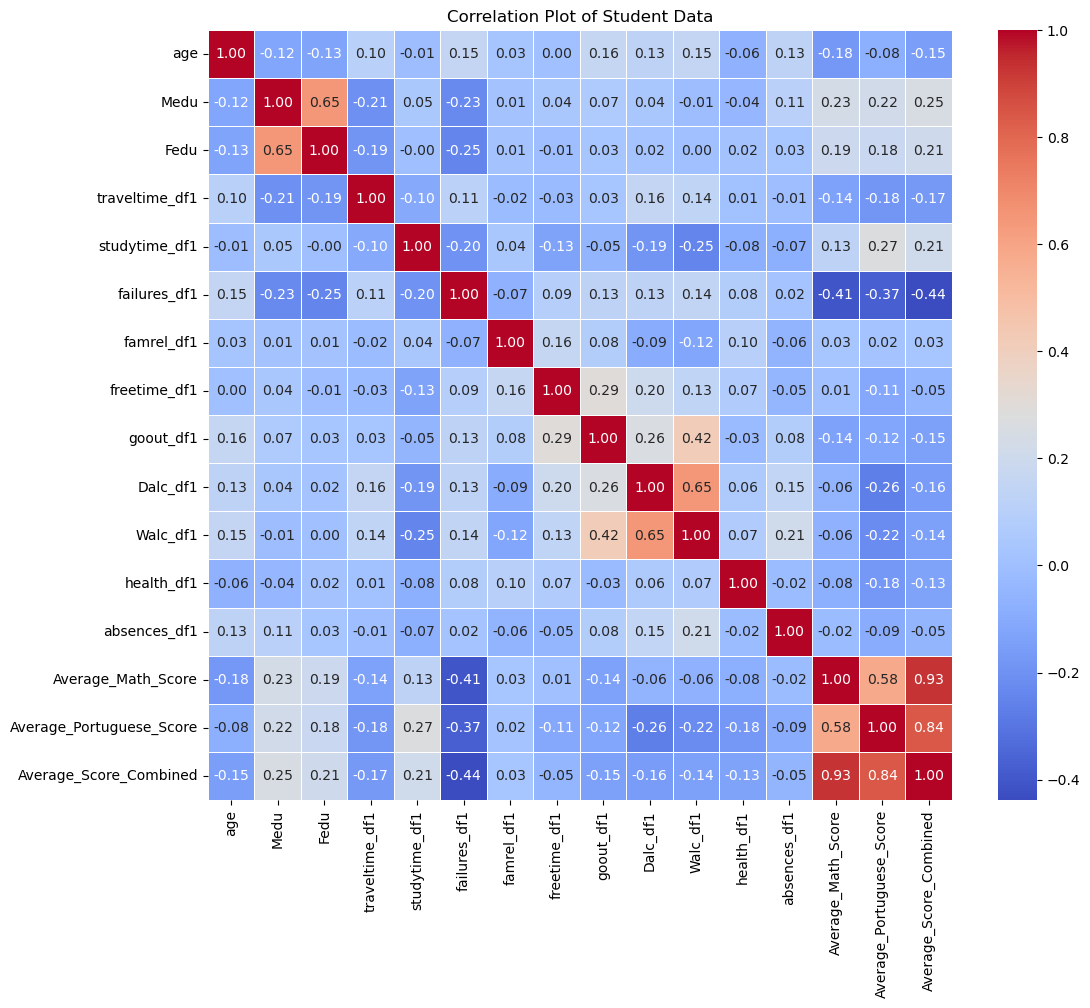

In [44]:


import seaborn as sns
import matplotlib.pyplot as plt



correlation_matrix = merged_df.corr()



plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot of Student Data')
plt.show()


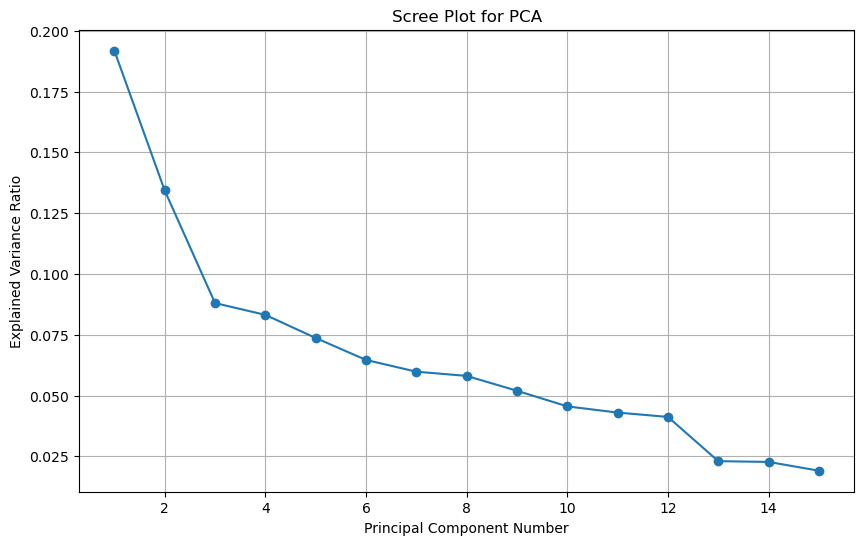

In [52]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# numeric columns
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns

# Exclude non-numeric columns
X = merged_df[numeric_columns].drop('Average_Score_Combined', axis=1)

# Standardize 
X_standardized = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Scree Plot for PCA')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()




From the PCA conducted above we can see the elbow at 3 Principal Components. Which should be the ideal number of Principal components selected. Principal component numbers beyond 3, indicates that additional principal components contribute less and less to the cumulative explained variance. 